ANLYSIS OF MEDICAL LITERATURE ON CANCER
LOAD DATASET

In [9]:
import pandas as pd

data = pd.read_csv('cancer_research_pubmed.csv')

print(data.head())


                                           Title  \
0      Measuringcancerevolution from the genome.   
1           Cancerand cure: A critical analysis.   
2             Fieldcancerizationin breastcancer.   
3  Tumor cell metabolism:cancer'sAchilles' heel.   
4                                 What IsCancer?   

                                             Authors  \
0  Trevor A Graham, Andrea Sottoriva, Trevor A Gr...   
1           P S Roy, B J Saikia, P S Roy, B J Saikia   
2  Emanuela Gadaleta, Graeme J Thorn, Helen Ross-...   
3  Guido Kroemer, Jacques Pouyssegur, Guido Kroem...   
4                 Daniel M Hausman, Daniel M Hausman   

                                            Abstract  \
0  The temporal dynamics of cancer evolution rema...   
1  Cancer is one of the most dreaded diseases of ...   
2  Breast cancer affects one in seven women world...   
3  The essential hallmarks of cancer are intertwi...   
4  This essay focuses on themes in Explaining Can...   

             

DATA CLEANING


In [10]:
#finding null values
missing_data = data.isnull().sum()

print("Missing data per column:\n", missing_data)


Missing data per column:
 Title           0
Authors        15
Abstract        0
Link            0
publication     0
dtype: int64


In [11]:
# Fill missing values
data['Authors'] = data['Authors'].fillna('Unknown Author')



In [13]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

print("Missing data per column:\n", missing_data)


Missing data per column:
 Title          0
Authors        0
Abstract       0
Link           0
publication    0
dtype: int64


EXPLORATORY DATA ANALYSIS

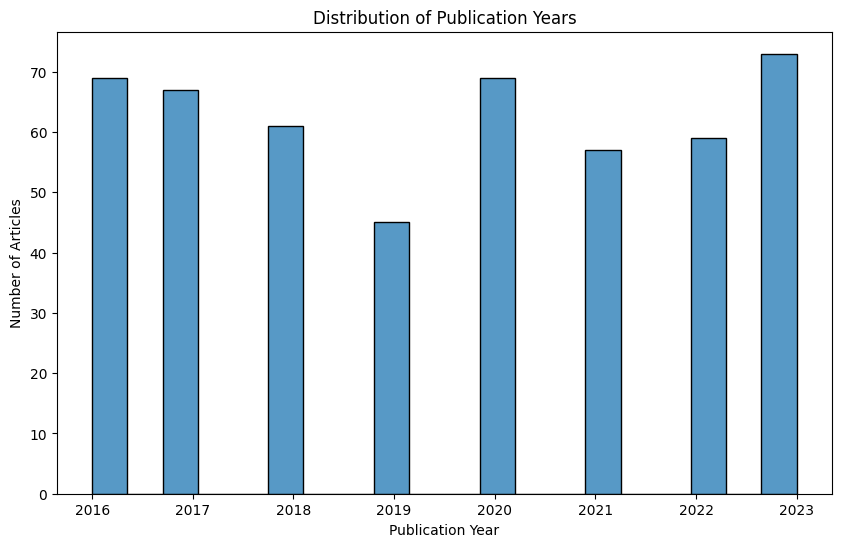

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of publication years
plt.figure(figsize=(10,6))
sns.histplot(data['publication'], bins=20, kde=False)
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.show()


In [16]:
# Calculate word count for abstract
data['Word Count'] = data['Abstract'].apply(lambda x: len(x.split()))

print("\nSummary statistics for word counts of abstracts:\n", data['Word Count'].describe())



Summary statistics for word counts of abstracts:
 count    500.000000
mean     138.396000
std      101.371137
min        3.000000
25%       45.500000
50%      142.000000
75%      214.250000
max      427.000000
Name: Word Count, dtype: float64


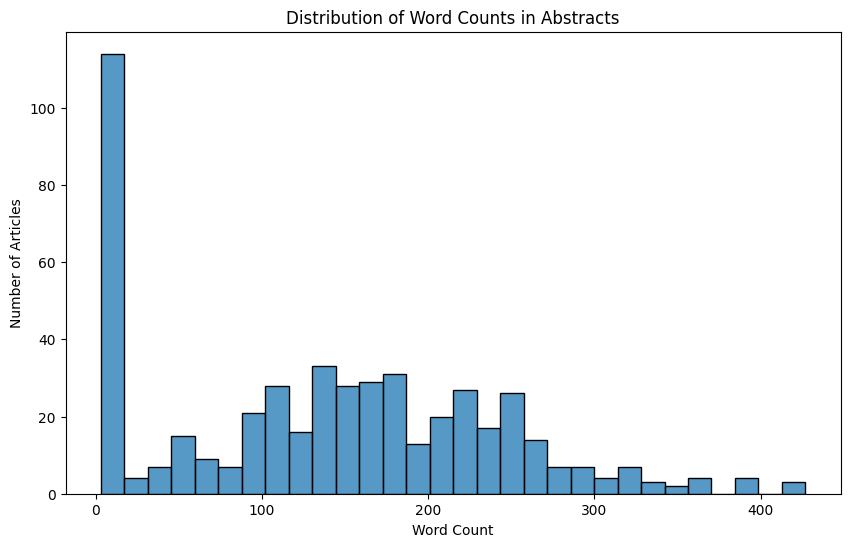

In [17]:
# Plot the distribution of word counts in abstracts
plt.figure(figsize=(10,6))
sns.histplot(data['Word Count'], bins=30, kde=False)
plt.title('Distribution of Word Counts in Abstracts')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()


In [18]:
#top 20 most common words in abstract
from sklearn.feature_extraction.text import CountVectorizer

# Convert abstracts to lowercase
data['Abstract'] = data['Abstract'].str.lower()

# Use CountVectorizer to get the most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(data['Abstract'])

words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

# Create a DataFrame 
word_freq_df = pd.DataFrame({'Word': words, 'Count': word_counts}).sort_values(by='Count', ascending=False)

print("\nTop 20 most common words in abstracts:\n", word_freq_df)



Top 20 most common words in abstracts:
              Word  Count
2          cancer   1501
5         cancers    375
12       patients    367
8           cells    353
19          tumor    295
7            cell    278
11          field    264
3   cancerization    219
4       cancerous    205
16         tissue    163
18      treatment    162
1          breast    160
6       carcinoma    153
9        clinical    147
14        results    146
17        tissues    145
13        primary    133
15           risk    133
10     expression    130
0       available    126


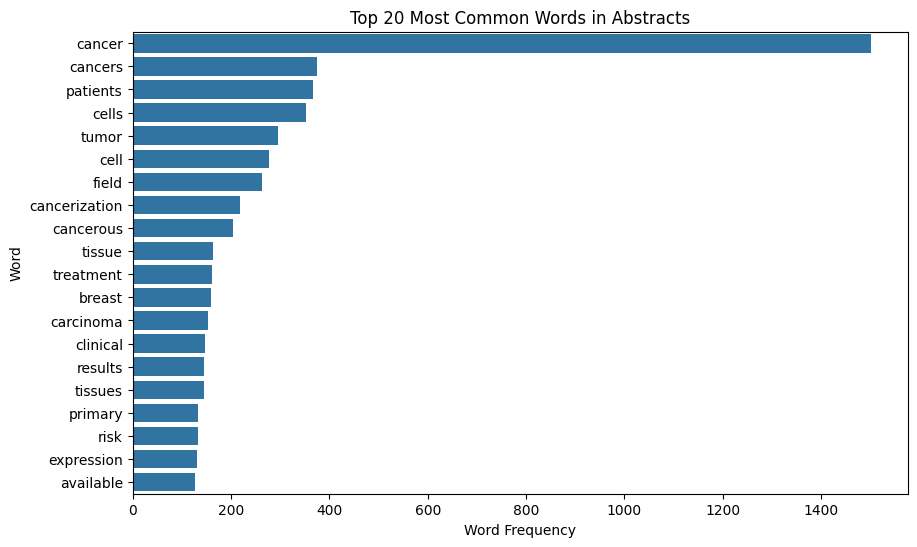

In [19]:
# Plot the most common words in the abstracts
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', data=word_freq_df)
plt.title('Top 20 Most Common Words in Abstracts')
plt.xlabel('Word Frequency')
plt.ylabel('Word')
plt.show()


In [20]:
# Get the top 10 most common authors
# Split authors, explode into individual rows, and count the frequency
authors_series = data['Authors'].str.split(',').explode().str.strip()

top_authors = authors_series.value_counts().head(10)

print("\nTop 10 most common authors:\n", top_authors)



Top 10 most common authors:
 Authors
Unknown Author        15
Toshikazu Ushijima    10
M E Itoiz              8
Trevor A Graham        8
Marianna Karamanou     6
Katherine Hobson       6
George Androutsos      6
Jean Marx              6
Kit Curtius            6
Anne Le                6
Name: count, dtype: int64


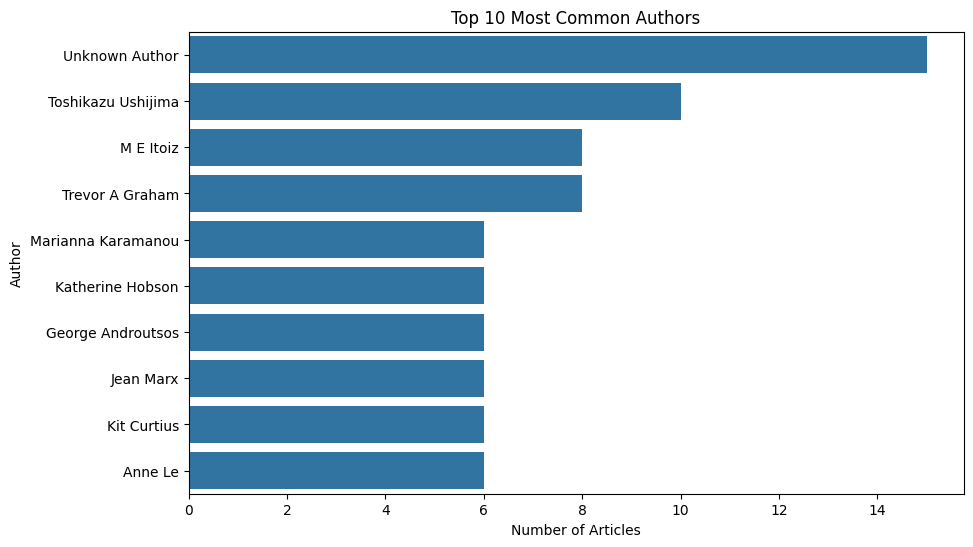

In [21]:
# Plot the top 10 authors
plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Most Common Authors')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.show()


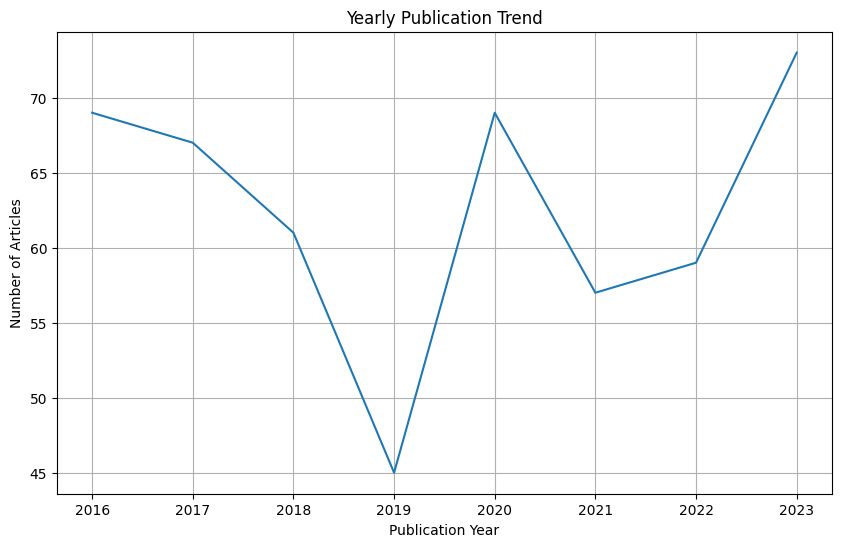

In [23]:
# Group by 'Publication Year' and count the number of articles per year
yearly_trend = data.groupby('publication').size()

plt.figure(figsize=(10,6))
yearly_trend.plot(kind='line')
plt.title('Yearly Publication Trend')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [24]:
# Find the top 5 lengthiest abstracts
top_abstracts = data[['Title', 'Word Count', 'Abstract']].sort_values(by='Word Count', ascending=False).head(5)

print("\nTop 5 lengthiest abstracts:\n", top_abstracts)



Top 5 lengthiest abstracts:
                                                  Title  Word Count  \
471  FURTHER EXPERIMENTS ON THE CAUSE OF SEQUENTIAL...         427   
248  Bottom up design of nanoparticles for anti-can...         421   
146  [Prevention of cervicalcancer(II): prophylacti...         420   
186  The presence ofcancer-associated fibroblast in...         391   
464  Potential role of mast cells in hamster cheek ...         389   

                                              Abstract  
471  when crystalline 20-methylcholanthrene (mc) an...  
248  the story starts in basel at clinam in 2013, w...  
146  despite the considerable success of early scre...  
186  purpose:cancer-associated fibroblasts (cafs) a...  
464  during the process of activation, mast cells r...  



Top 20 most common words in abstracts:
              Word  Count
2          cancer   1501
5         cancers    375
12       patients    367
8           cells    353
19          tumor    295
7            cell    278
11          field    264
3   cancerization    219
4       cancerous    205
16         tissue    163
18      treatment    162
1          breast    160
6       carcinoma    153
9        clinical    147
14        results    146
17        tissues    145
13        primary    133
15           risk    133
10     expression    130
0       available    126


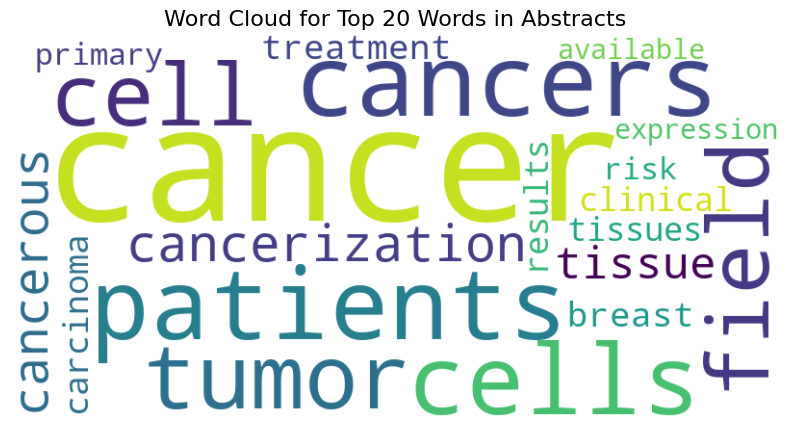

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data['Abstract'] = data['Abstract'].str.lower()

# Use CountVectorizer to get the most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(data['Abstract'])

words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

word_freq_df = pd.DataFrame({'Word': words, 'Count': word_counts}).sort_values(by='Count', ascending=False)

print("\nTop 20 most common words in abstracts:\n", word_freq_df)

word_freq_dict = dict(zip(words, word_counts)) 

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Top 20 Words in Abstracts', fontsize=16)
plt.show()



Top Trending Keywords related to Cancer Types:
 cancer           35.792442
breast           17.335819
cancers          12.965300
tumor            12.600036
lung             12.187851
cells            11.779171
patients         11.697680
field            10.917361
carcinoma        10.595781
cell              9.660891
treatment         9.461073
clinical          8.551765
cancerous         8.212314
risk              7.864803
new               7.669165
primary           7.584496
tissue            7.528030
cancerization     7.505324
cases             7.418198
therapy           7.353889
dtype: float64


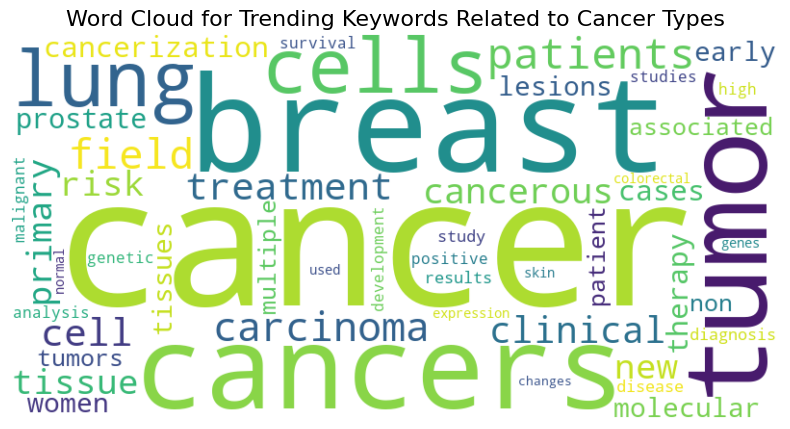


Cancer Type Trends:
    Cancer Type  Count
0       breast     65
1         lung     45
2        colon     27
3     prostate     24
5     melanoma     15
9     cervical     11
7      ovarian      8
8   pancreatic      8
10       renal      5
6     lymphoma      4
4     leukemia      3


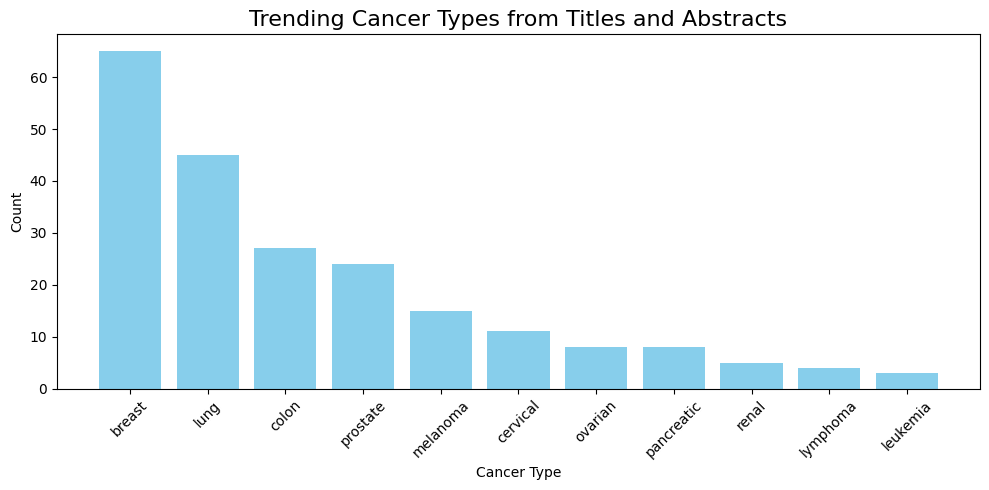

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.read_csv('cancer_research_pubmed.csv')  
data['combined'] = data['Title'] + ' ' + data['Abstract']

cancer_types = ['breast', 'lung', 'colon', 'prostate', 'leukemia', 'melanoma', 'lymphoma', 'ovarian', 'pancreatic', 'cervical', 'renal']

filtered_data = data[data['combined'].str.contains('|'.join(cancer_types), case=False, na=False)]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = vectorizer.fit_transform(filtered_data['combined'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=filtered_data.index)

# Sum the TF-IDF scores for each word across all documents
keyword_scores = tfidf_df.sum().sort_values(ascending=False)

print("\nTop Trending Keywords related to Cancer Types:\n", keyword_scores.head(20))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Trending Keywords Related to Cancer Types', fontsize=16)
plt.show()

cancer_type_counts = {cancer: filtered_data['combined'].str.contains(cancer, case=False, na=False).sum() for cancer in cancer_types}

cancer_trend_df = pd.DataFrame(cancer_type_counts.items(), columns=['Cancer Type', 'Count']).sort_values(by='Count', ascending=False)

print("\nCancer Type Trends:\n", cancer_trend_df)

plt.figure(figsize=(10, 5))
plt.bar(cancer_trend_df['Cancer Type'], cancer_trend_df['Count'], color='skyblue')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Trending Cancer Types from Titles and Abstracts', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


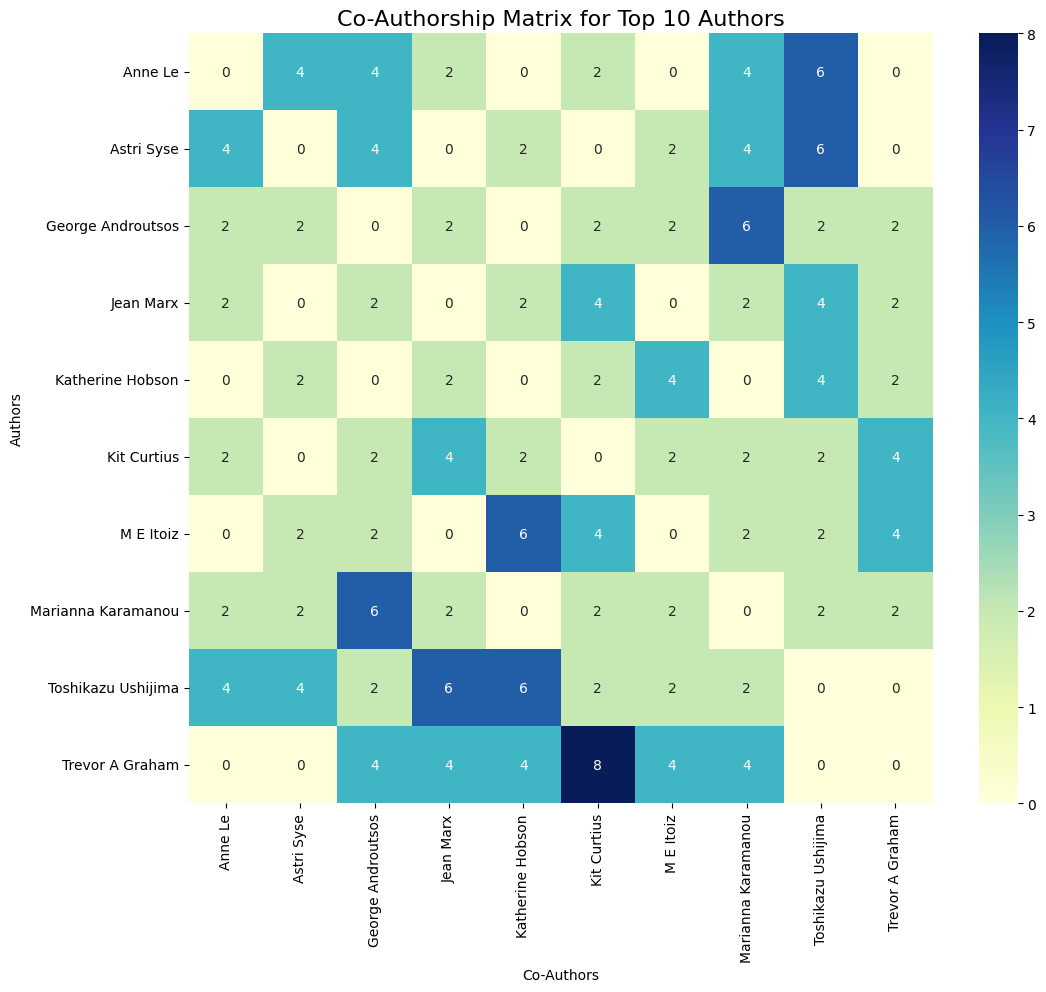

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_csv('cancer_research_pubmed.csv')

data['Authors'] = data['Authors'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

data_exploded = data.explode('Authors')

top_authors = data_exploded['Authors'].value_counts().nlargest(10).index.tolist()

# Filter the exploded DataFrame for top authors
top_authors_data = data_exploded[data_exploded['Authors'].isin(top_authors)]

co_author_pairs = []

for idx, row in top_authors_data.iterrows():
    authors = row['Authors']
    
    co_authors = top_authors_data[top_authors_data['publication'] == row['publication']]['Authors'].unique()
    
    for co_author in co_authors:
        if co_author != authors: 
            co_author_pairs.append((authors, co_author))

co_author_df = pd.DataFrame(co_author_pairs, columns=['Author1', 'Author2'])

co_auth_matrix = pd.crosstab(co_author_df['Author1'], co_author_df['Author2'])

plt.figure(figsize=(12, 10))
sns.heatmap(co_auth_matrix, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Co-Authorship Matrix for Top 10 Authors', fontsize=16)
plt.xlabel('Co-Authors')
plt.ylabel('Authors')
plt.show()


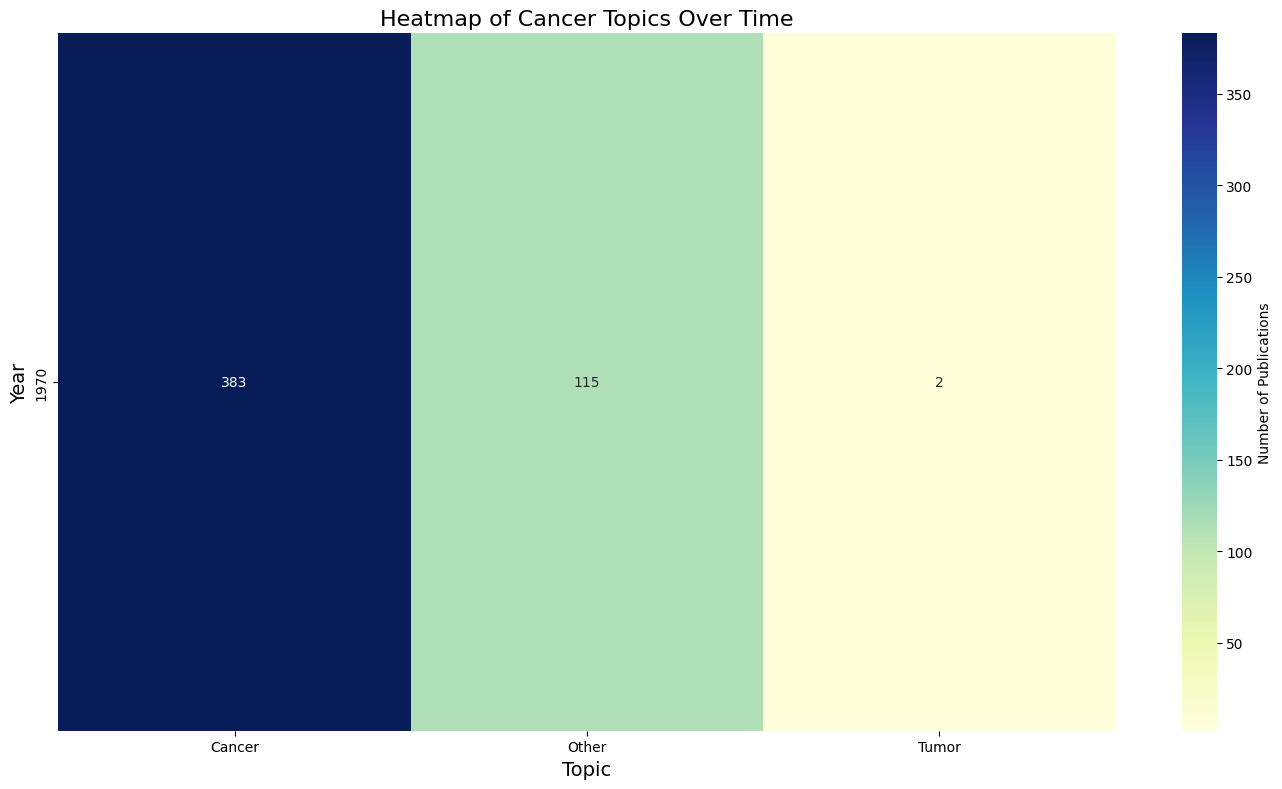

In [30]:
import seaborn as sns

# Heatmap for topic trends over time
plt.figure(figsize=(14, 8))
sns.heatmap(topic_trends, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Publications'})

plt.title('Heatmap of Cancer Topics Over Time', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.tight_layout()
plt.show()


Sentiment Counts:
 Sentiment
Positive    459
Negative     32
Neutral       9
Name: count, dtype: int64


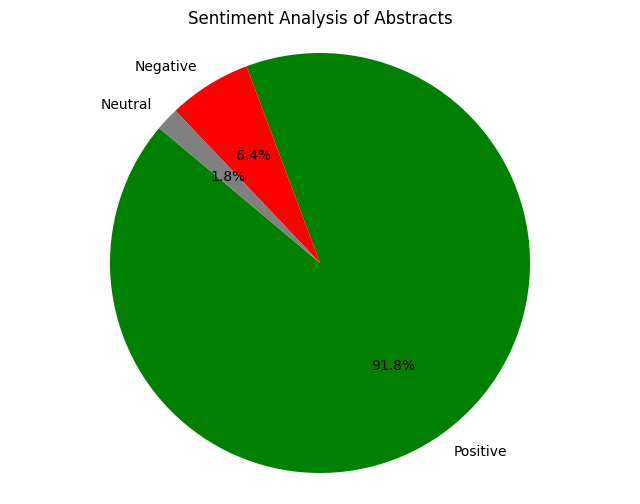

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Abstract'].apply(get_sentiment)

sentiment_counts = data['Sentiment'].value_counts()

print("Sentiment Counts:\n", sentiment_counts)

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'grey'])
plt.title('Sentiment Analysis of Abstracts')
plt.axis('equal')  
plt.show()


MODELLING

Confusion Matrix:
 [[ 0  0  7]
 [ 0  0  3]
 [ 0  0 90]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00         3
    Positive       0.90      1.00      0.95        90

    accuracy                           0.90       100
   macro avg       0.30      0.33      0.32       100
weighted avg       0.81      0.90      0.85       100



c:\Users\jaelh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaelh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaelh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

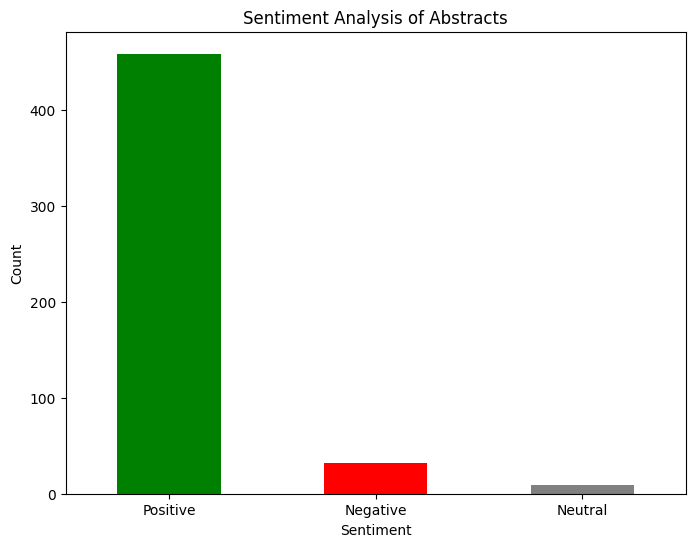

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Abstract'].apply(get_sentiment)

data['Title_Abstract'] = data['Title'] + ' ' + data['Abstract']  

X = data['Title_Abstract']  
y = data['Sentiment']       

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

y_pred_class = log_reg_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Analysis of Abstracts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


GUI


In [3]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

data = pd.read_csv('cancer_research_pubmed.csv')

cancer_types = ['Breast Cancer', 'Lung Cancer', 'Prostate Cancer', 'Colorectal Cancer', 'Skin Cancer']

def show_publications(event):
    result_listbox.delete(0, tk.END)
    
    selected_cancer = cancer_type_var.get()

    filtered_data = data[data['Abstract'].str.contains(selected_cancer, case=False, na=False)]
    
    for index, row in filtered_data.iterrows():
        result_listbox.insert(tk.END, f"Title: {row['Title']}")
        result_listbox.insert(tk.END, f"Authors: {row['Authors']}")
        result_listbox.insert(tk.END, f"Link: {row['Link']}")
        result_listbox.insert(tk.END, "-" * 50)
root = tk.Tk()
root.title("Cancer Research Publications")

label = tk.Label(root, text="Select Cancer Type:")
label.pack(pady=10)
cancer_type_var = tk.StringVar()

dropdown = ttk.Combobox(root, textvariable=cancer_type_var, values=cancer_types)
dropdown.bind("<<ComboboxSelected>>", show_publications)
dropdown.pack(pady=10)

result_listbox = tk.Listbox(root, width=80, height=20)
result_listbox.pack(pady=20)

root.mainloop()
